## 1. load Packages

In [2]:
import os
import numpy as np
import pandas as pd
import cellrank as cr
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib import rcParams
import seaborn as sns

## 2. params

In [3]:
os.chdir("D:/Projects/CASH-Human/")
dir_for_ldata_sub = "./data/loom/ldata_sub/"


## setup
scv.settings.verbosity = 3
sc.settings.verbosity = 3  

### print version info
scv.logging.print_version()
sc.logging.print_versions()
# sns.despine()
# sns.set_style("whitegrid")

### fig
sc.settings.set_figure_params(dpi = 100, dpi_save = 300, fontsize = 14, frameon = True,figsize = (8,8))
scv.settings.set_figure_params(dpi = 100, dpi_save = 300, fontsize = 14, frameon = None, figsize = (8,8)) 

Running scvelo 0.3.2 (python 3.12.4) on 2024-09-13 19:12.
-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                         10.3.0
anyio                       NA
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.11.0
bottleneck                  1.3.7
brotli                      1.0.9
cellrank                    2.0.5
certifi                     2024.06.02
cffi                        1.16.0
chardet                     4.0.0
charset_normalizer          2.0.4
cloudpickle                 2.2.1
colorama                    0.4.6
comm                        0.2.1
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.12.2
dask                        2024.5.0
dateutil                    2.9.0.post0
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
dill                        0.3.8
docrep                      0.

## 3. load data

NK_ldata.h5ad
NK
ldata:
 AnnData object with n_obs × n_vars = 2830 × 37487
    obs: 'patient', 'barcode', 'group', 'patient_id', 'sub_celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
ldata_clusters:
 ['c29_NK_NFKBIA', 'c28_NK_CD160', 'c32_NK_CREM', 'c33_NK_IL32', 'c30_NK_DNAJB1', 'c34_NK_CX3CR1', 'c31_NK_CCL4']
Categories (7, object): ['c28_NK_CD160', 'c29_NK_NFKBIA', 'c30_NK_DNAJB1', 'c31_NK_CCL4', 'c32_NK_CREM', 'c33_NK_IL32', 'c34_NK_CX3CR1']
ldata_sub:
 View of AnnData object with n_obs × n_vars = 1243 × 37487
    obs: 'patient', 'barcode', 'group', 'patient_id', 'sub_celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
ldata_sub_clusters:
 ['c32_NK_CREM', 'c33_NK_IL32', 'c34_NK_CX3CR1']
Categories (3, object): ['c32_NK_CREM', 'c33_NK_IL32', 'c34_NK_CX3CR1']
computing PCA
    with n_comps=50

d:\software\anaconda3\Lib\site-packages\scanpy\preprocessing\_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


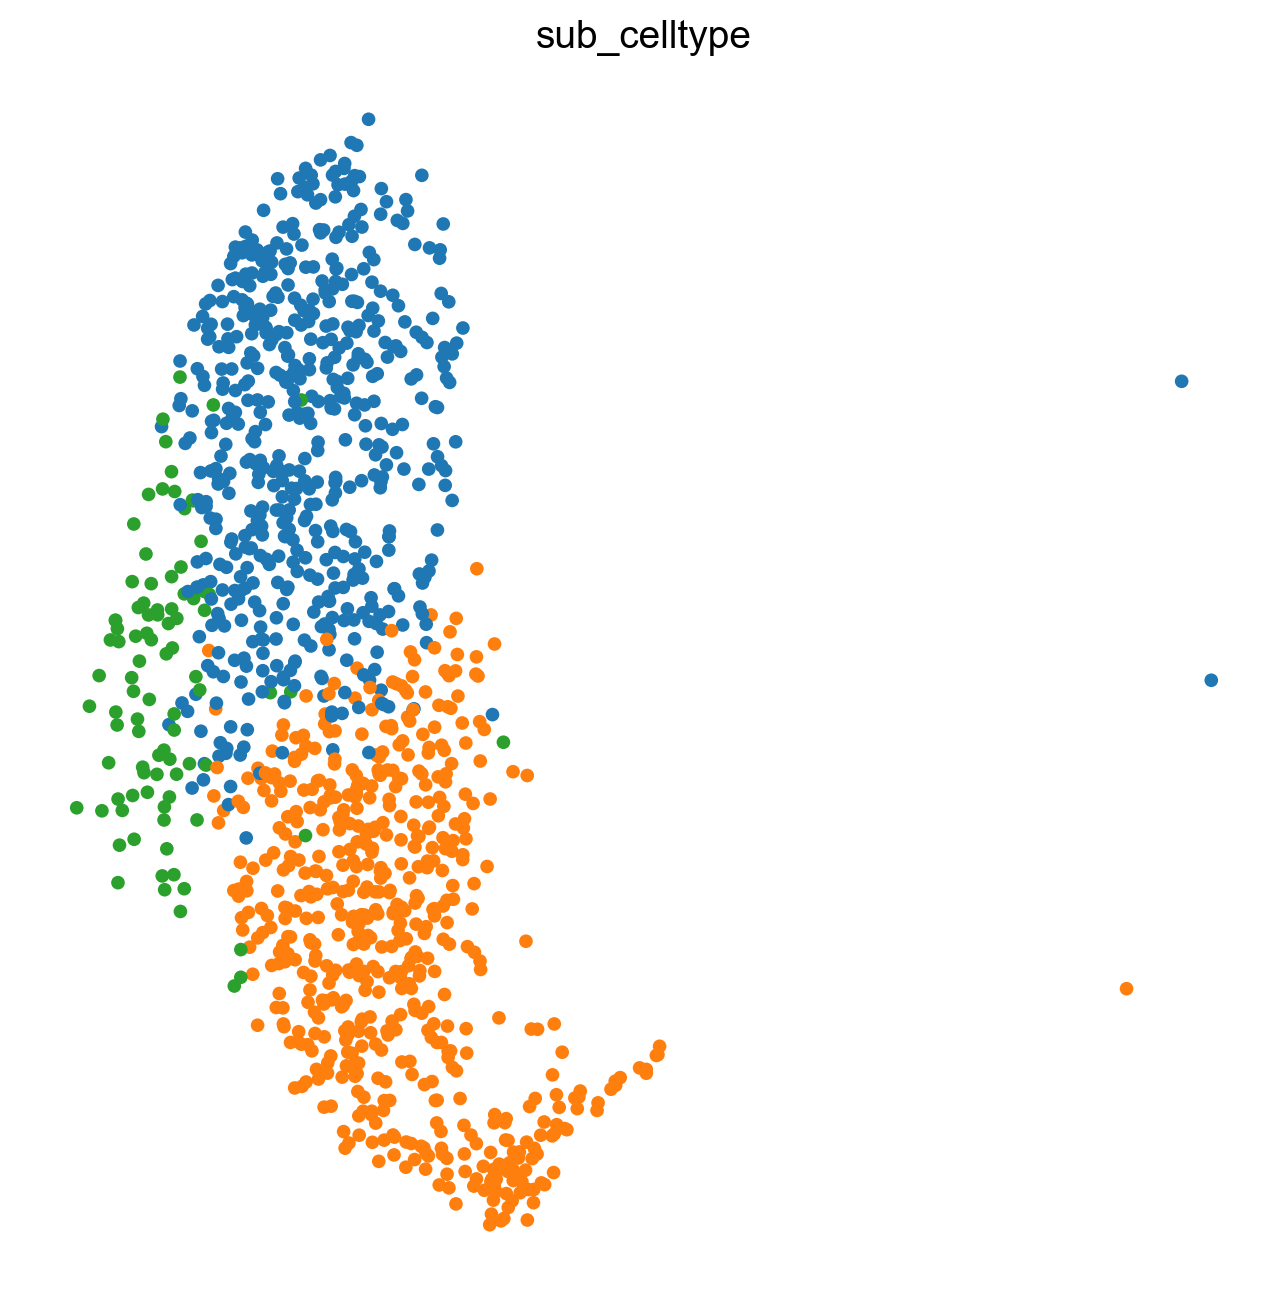

Normalized count data: X, spliced, unspliced.


d:\software\anaconda3\Lib\site-packages\scvelo\preprocessing\utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Logarithmized X.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/1243 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and wi

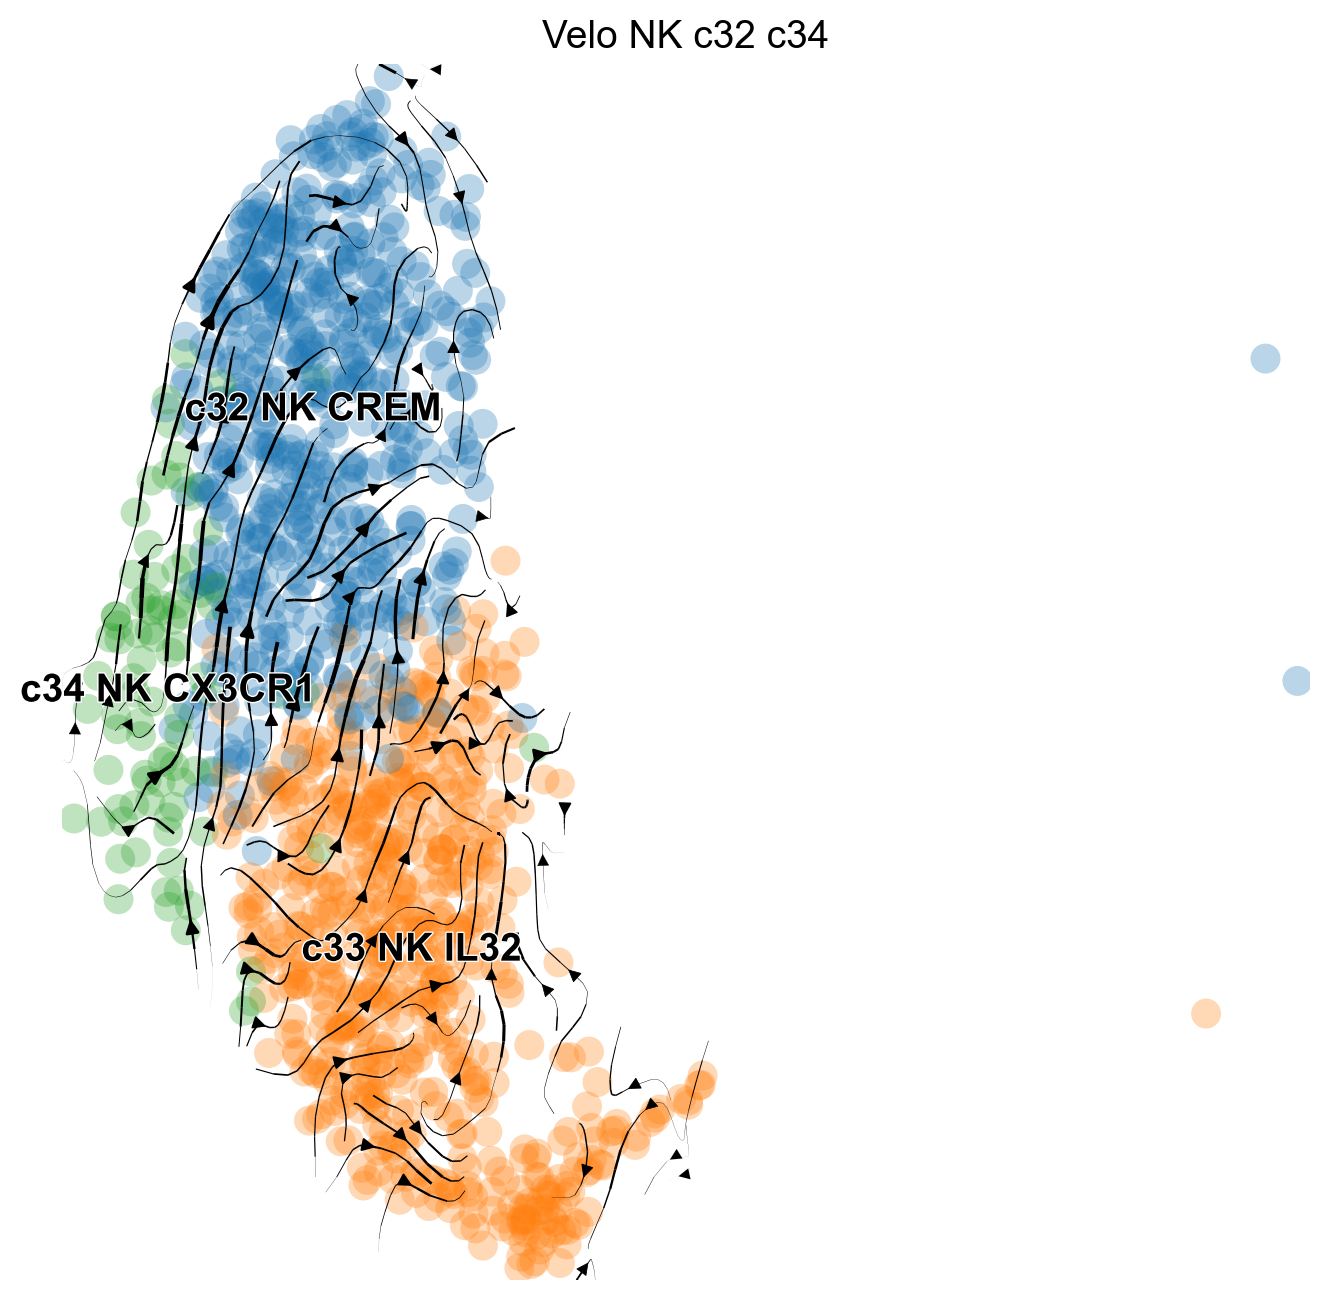

In [6]:
# for i_file in os.listdir(dir_for_ldata_sub):
i_file = "NK_ldata.h5ad"
print(i_file)
cell = str.split(i_file, "_")[0]
print(cell)
## load data
ldata = scv.read(os.path.join(dir_for_ldata_sub, i_file))
print("ldata:\n", ldata)
print("ldata_clusters:\n", pd.unique(ldata.obs["sub_celltype"]))

cluster_group = ["c28_NK_CD160", "c29_NK_NFKBIA", "c30_NK_DNAJB1", "c31_NK_CCL4"]
# ldata = ldata[ldata.obs["sub_celltype"].isin(cluster_group)]
ldata = ldata[~ldata.obs["sub_celltype"].isin(cluster_group)]
print("ldata_sub:\n", ldata)
print("ldata_sub_clusters:\n", pd.unique(ldata.obs["sub_celltype"]))

## preprocess
sc.pp.pca(ldata)
sc.pp.neighbors(ldata, n_pcs = 50, n_neighbors = 30)

sc.pl.umap(ldata, color = "sub_celltype", frameon = False, legend_loc = "best")

## compute
scv.pp.filter_and_normalize(ldata)
scv.pp.moments(ldata)

# scv.tl.velocity(ldata)
scv.tl.velocity(ldata, group_by = 'sub_celltype')
scv.tl.velocity_graph(ldata)

## plot
scv.pl.velocity_embedding_stream(ldata, basis = "X_umap", color = "sub_celltype", title = "Velo_NK_c32_c34")